In [5]:
bike <- read.csv('Project_file//train.csv')

In [6]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [7]:
library(ggplot2)

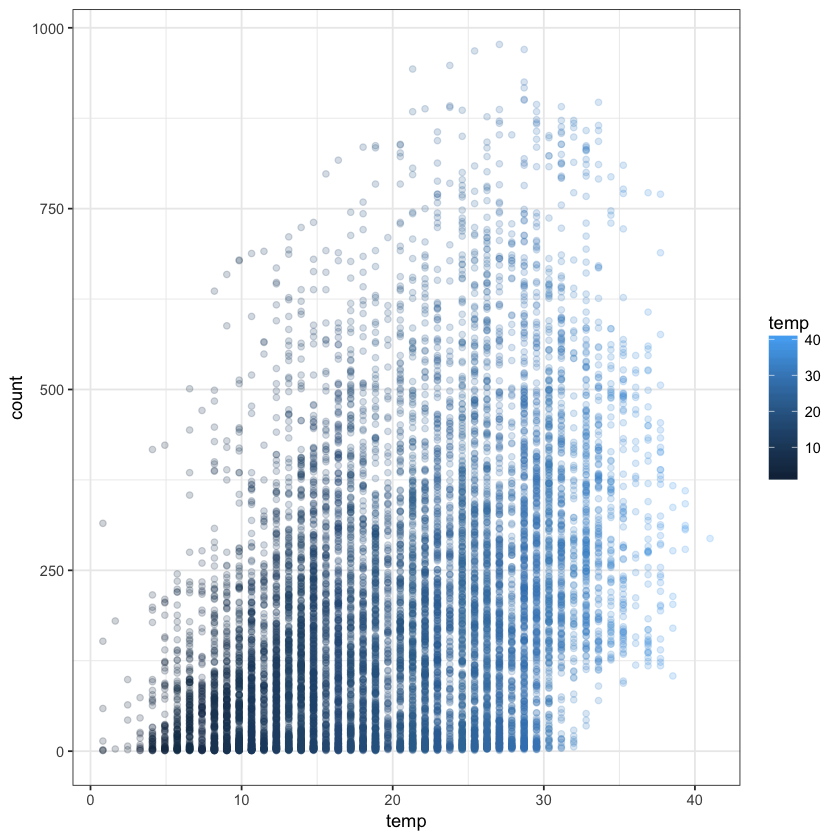

In [8]:
ggplot(bike,aes(temp,count)) + geom_point(alpha=0.2, aes(color=temp)) + theme_bw()

In [9]:
bike$datetime <- as.POSIXct(bike$datetime)

In [10]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


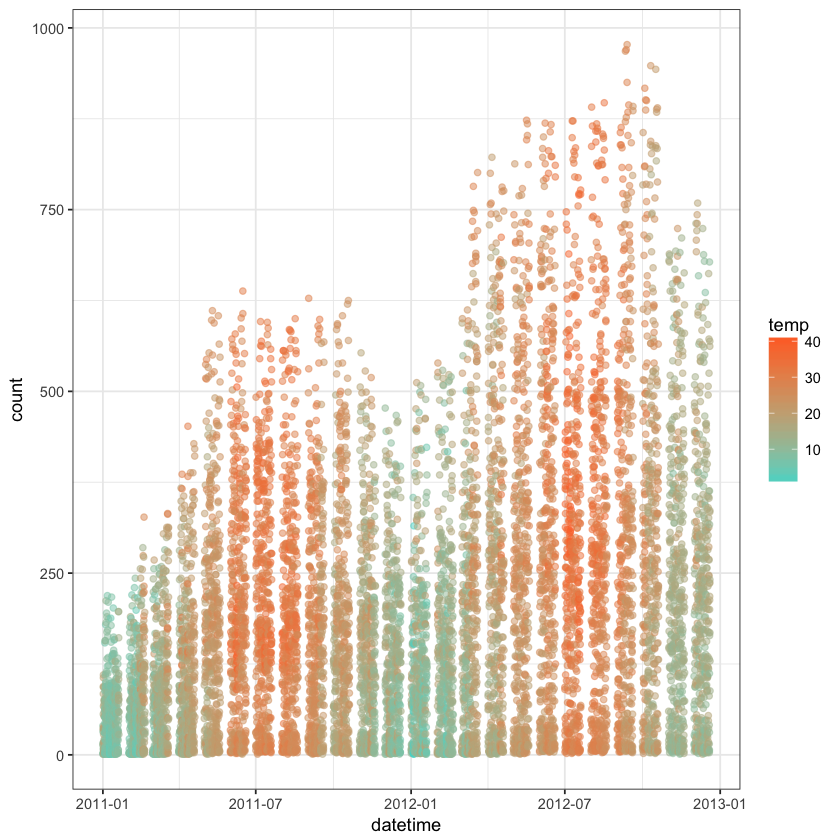

In [11]:
ggplot(bike,aes(datetime,count)) + geom_point(aes(color=temp),alpha=0.5)  + scale_color_continuous(low='#55D8CE',high='#FF6E2E') +theme_bw()

In [12]:
cor(bike[,c('temp','count')])

,temp,count
temp,1.0000000,0.3944536
count,0.3944536,1.0000000


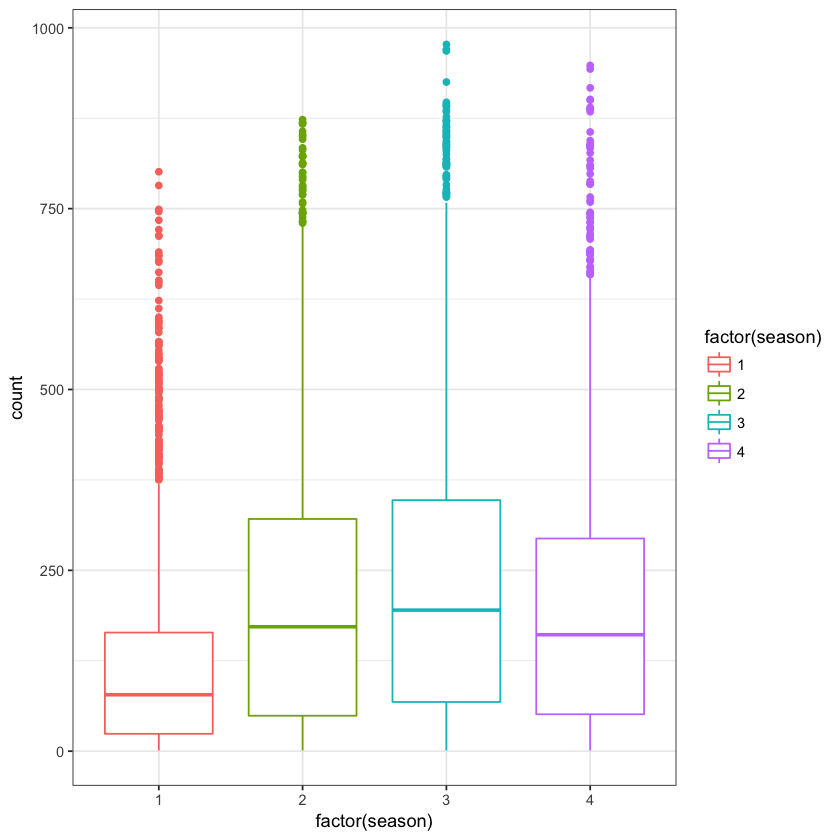

In [13]:
ggplot(bike,aes(factor(season),count)) + geom_boxplot(aes(color=factor(season))) +theme_bw()

In [14]:
bike$hour <- sapply(bike$datetime,function(x){format(x,"%H")})

In [15]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


In [16]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



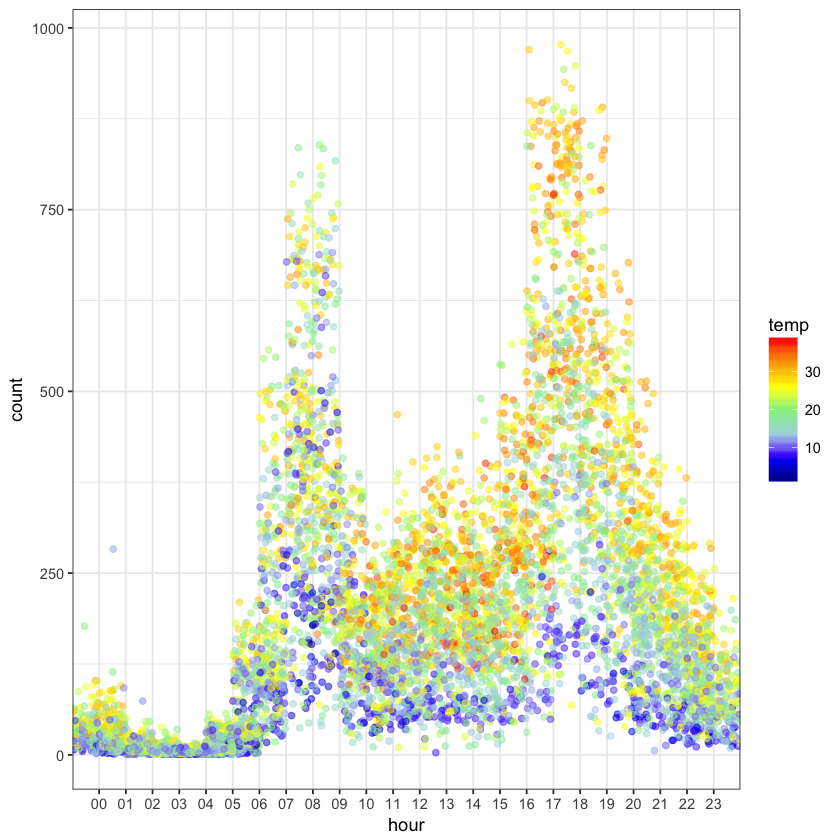

In [17]:
pl <- ggplot(filter(bike,workingday==1),aes(hour,count)) 
pl <- pl + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.5)
pl <- pl + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
pl + theme_bw()

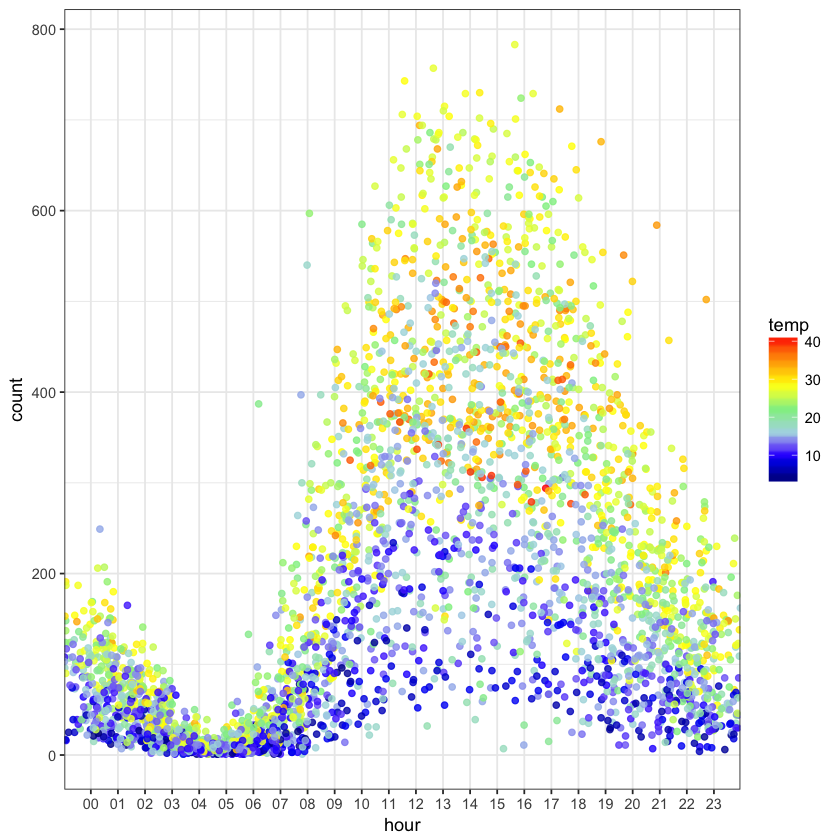

In [18]:
pl <- ggplot(filter(bike,workingday==0),aes(hour,count)) 
pl <- pl + geom_point(position=position_jitter(w=1, h=0),aes(color=temp),alpha=0.8)
pl <- pl + scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red'))
pl + theme_bw()

In [19]:
temp.model <- lm(count~temp,bike)

In [20]:
summary(temp.model)


Call:
lm(formula = count ~ temp, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


In [21]:
# Method 1
6.0462 + 9.17*25

[1] 235.2962

In [22]:
# Method 2
temp.test <- data.frame(temp=c(25))
predict(temp.model,temp.test)

1 
235.3097

In [23]:
bike$hour <- sapply(bike$hour,as.numeric)

In [24]:
model <- lm(count ~ . -casual - registered -datetime -atemp,bike )

In [25]:
summary(model)


Call:
lm(formula = count ~ . - casual - registered - datetime - atemp, 
    data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16
